In [1]:
import os
os.chdir(r'/Users/ryanmccrickerd/desktop/rypy')

In [2]:
import numpy as np
import pandas as pd
import rypy as rp
from matplotlib import pyplot as plt
from scipy.stats import norm
import mpl
% matplotlib inline

In [3]:
nx = np.newaxis
mpl.config(scale=1.5,print_keys=False)

In [4]:
plt.rcParams['figure.figsize'] = [3*1.618,3]
plt.rcParams['legend.loc'] = 'center left'

In [5]:
t = np.linspace(0,1,1001)
u1,u2 = 1,0
u = u1,u2

Set recurring parameters

In [6]:
V0 = 0.02
θ = 0.01
ρ = 0.7
ν = 1.5
H = -1
ɛ = 1/256
params = ɛ,H,ν,V0,θ

In [168]:
print('Starting level =',np.round(100*np.sqrt(V0),1),'%')
print('Reversion level =',np.round(100*np.sqrt(V0 + ɛ**(H + 0.5)*θ),1),'%')

Starting level = 14.1 %
Reversion level = 42.4 %


In [72]:
T = 7
ξ = np.array([0,3,5])
ξ2 = ξ
if np.prod(ξ - T) != 0: 
    ξ2 = np.append(ξ,T)
ξ2 = np.sort(ξ2)
mask = (ξ2 <= T)
ξ2 = ξ2[mask]
ξ2 = np.ediff1d(ξ2)
ξ2

array([3, 2, 2])

In [77]:
def truncate_curve(time_points_in, time_horizon):
    time_points_out = time_points_in
    if np.prod(time_horizon - time_points_out) != 0: 
        time_points_out = np.append(time_points_out, time_horizon)
    time_points_out = np.sort(time_points_out)
    mask = (time_points_out <= time_horizon)
    time_points_out = time_points_out[mask]
    return np.ediff1d(time_points_out)

In [86]:
t = 100
ξ = np.array([0,3,5])
truncate_curve(ξ,t)

array([ 3,  2, 95])

In [56]:
np.prod(ξ - T)

4

In [12]:
ξ2 = np.zeros((sum(T >= ξ[:,0]),2))
ξ2.shape

(2, 2)

In [9]:
T = 5
ξ2 = ξ    
for i in range(ξ.shape[0])
    
    
    if T > ξ[i+1,0]:
        ξ2[i,0] = ξ[i+1,0] - ξ[i,0]
    else: ξ2[i,0] = T - ξ[i,0]
ξ2

array([[ 2.  ,  0.02],
       [ 2.  ,  0.03]])

In [121]:
ξ = np.array([[0,0.02],
              [1,0.02],
              [3,0.1]])
t = 3.7
times = truncate_curve(ξ[:,0],t)
ξ = np.vstack((times, ξ[:len(times),1])).T
ξ

array([[ 1.  ,  0.02],
       [ 2.  ,  0.02],
       [ 0.7 ,  0.1 ]])

In [122]:
def char_func(u,t,params):
    ξ,ρ,ν,H,ɛ = params
    times = truncate_curve(ξ[:,0],t)
    ξ = np.vstack((times, ξ[:len(times),1])).T
    # first deal with NIG limit
    if ɛ == 0:
        C = 1/ν**2*(1 - ρ*ν*u - np.sqrt((1 - ρ*ν*u)**2 + ν**2*u*(1 - u)))
        return np.exp(C*np.sum(ξ[:,0]*ξ[:,1]))
    # otherwise change to convenient notation
    α = ν*ɛ**(H + 0.5)
    β = ɛ**-1
    #     γ = V0 + θ*ɛ**(H + 0.5)
    θ1 = 1 - α*ρ*u
    θ2 = np.sqrt(θ1**2 + α**2*u*(1 - u))
    θ3 = 0.5*β*θ2
    ΣA = np.sum((θ1*ξ[:,0] - θ2/θ3*np.log(np.cosh(θ3*ξ[:,0]) + θ1/θ2*np.sinh(θ3*ξ[:,0])))*ξ[:,1]/α**2)
    B = (θ1 - θ2*(θ1 + θ2*np.tanh(θ3*t))/(θ2 + θ1*np.tanh(θ3*t)))/β/α**2
    return np.exp(ΣA + B*ξ[0,1])

In [ ]:
# log-price characteristic function
# time-dep fwd var accepted
def log_price_cf(u,t,params):
    ξ,ρ,ν,H,ɛ = params
    
    # first deal with levy limits
    T = truncate_curve(ξ[:,0],t)
    if ɛ == 0:
        # also assumes H=-0.5, otherwise nonsense
        C = (1 - ρ*ν*u - np.sqrt((1 - ρ*ν*u)**2 + ν**2*u*(1 - u)))/ν**2
        Σ = T*ξ[:len(T),1]
        return np.exp(C*Σ)
    # otherwise change to convenient notation
    # fac = (0.5 - H)**(H - 0.5), ν *= fac, 
    α = ν*ɛ**(H + 0.5)
    β = ɛ**-1
    γ = ξ
    θ1 = 1 - α*ρ*u
    θ2 = np.sqrt(θ1**2 + α**2*u*(1 - u))
    θ3 = 0.5*β*θ2
    S,C,T = np.sinh(θ3*t),np.cosh(θ3*t),np.tanh(θ3*t)
    A = (θ1*t - θ2/θ3*np.log(C + θ1/θ2*S))*γ/α**2
    B = (θ1 - θ2*(θ1 + θ2*T)/(θ2 + θ1*T))/β/α**2
    return np.exp(ΣA + ΣBξ)

In [ ]:
def clean_func(u,t,ρ,ν,H,ɛ):
    

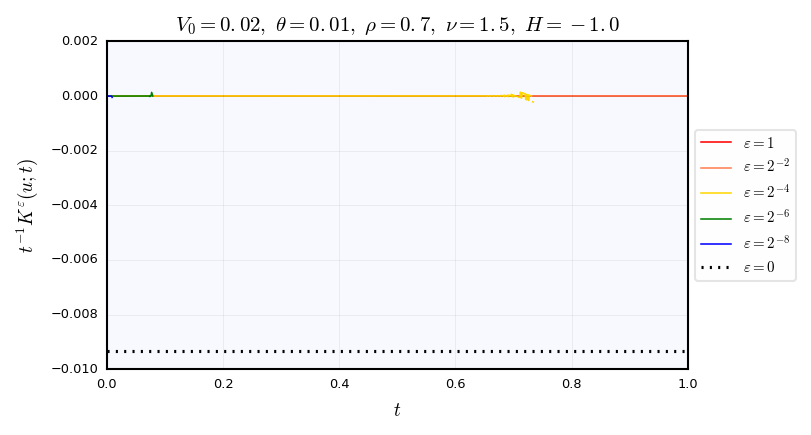

In [169]:
plot,axes = plt.subplots()

# now plot passage to limit
for ɛ in 2.**(-np.arange(0,10,2)):
    params = V0,θ,ρ,ν,H,ɛ
    M = rp.joint_mgf(u,t,params)
    axes.plot(t,np.log(M)/t)

# plot the limit
params = V0,θ,ρ,ν,H,0
M = rp.joint_mgf(u,t,params)
axes.plot(t,np.log(M)/t,'k:',lw=1.5)

axes.set_title(r'$V_0=%.2f,\ \theta=%.2f,\ \rho=%.1f,\ \nu=%.1f,\ H=%.1f$'%(V0,θ,ρ,ν,H))
axes.set_xlabel(r'$t$')
axes.set_ylabel(r'$t^{-1}K^\varepsilon(u;t)$')
axes.legend([r'$\varepsilon = 1$',
             r'$\varepsilon = 2^{-2}$',
             r'$\varepsilon = 2^{-4}$',
             r'$\varepsilon = 2^{-6}$',
             r'$\varepsilon = 2^{-8}$',
             r'$\varepsilon = 0$'], loc='center left', bbox_to_anchor=(1, 0.5))
# axes.set_ylim([-0.0025,0.0005])
plt.tight_layout()
# fname = r'joint-mgf-converge-6'
# plt.savefig(fname)

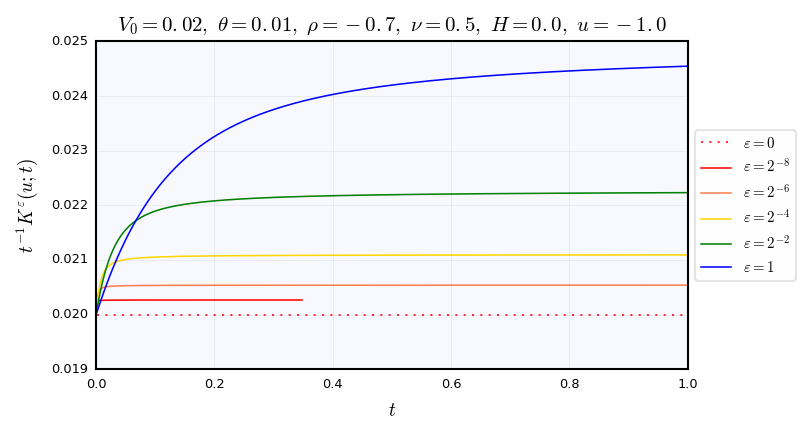

In [248]:
plot,axes = plt.subplots()

# plot the limit
params = V0,θ,ρ,ν,H,0
M = rp.log_price_mgf(u,t,params)
axes.plot(t,np.log(M)/t,'r:')

# now plot passage to limit
for ɛ in 2.**(np.arange(-12,-2,2)):
    params = V0,θ,ρ,ν,H,ɛ
    M = rp.log_price_mgf(u,t,params)
    axes.plot(t,np.log(M)/t)

axes.set_title(r'$V_0=%.2f,\ \theta=%.2f,\ \rho=%.1f,\ \nu=%.1f,\ H=%.01f,\ u=%.1f$'%(V0,θ,ρ,ν,H,u))
axes.set_xlabel(r'$t$')
axes.set_ylabel(r'$t^{-1}K^\varepsilon(u;t)$')
axes.legend([r'$\varepsilon = 0$',
             r'$\varepsilon = 2^{-8}$',
             r'$\varepsilon = 2^{-6}$',
             r'$\varepsilon = 2^{-4}$',
             r'$\varepsilon = 2^{-2}$',
             r'$\varepsilon = 1$'], loc='center left', bbox_to_anchor=(1, 0.5))
# axes.set_ylim([-0.0025,0.0005])
plt.tight_layout()
# fname = r'converge-6'
# plt.savefig(fname)